In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, balanced_accuracy_score
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score, roc_curve, auc, ConfusionMatrixDisplay

### Проведём предварительную обработку данных

In [3]:
# Загрузим датасет 5gym_churn.csv с помощью библиотеки pandas в Jupyter-ноутбуке
data = pd.read_csv(r'C:\Users\Dima\Desktop\aaa_GUAP_\Боженко\5gym_churn.csv')

In [4]:
# выведем первые 20 строк при помощи команды head:
data.head(20)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


Информация о клиентах фитнес клуба:
1. Пол
2. Близкое расположение
3. Сотрудник компании партнера
4. По промо друзей
5. Указан ли телефон
6. Длительность текущего абонемента
7. Посещение групповых занятий
8. Возраст
9. Средние траты на доп услуги
10.Количество месяцев до окончания абонемента
11. время с момента первого обращения в фитнесцентр (в месяцах) 
12.средняя частота посещений в неделю за все 
время с начала действия абонемента
13.средняя частота посещений в неделю за 
предыдущий месяц
14.Churn – факт ухода из клуба

In [5]:
data.astype({'Month_to_end_contract': 'int64'}) # Приведём столбец "Month_to_end_contract" к типу данных "int64":

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5,3,1.630108,1.596237,0


Целевым признаком выберем колонку с информацией покинул ли человек фитнес клуб или нет - Churn. Уберём из таблицы с признаками столбцы, сильно коррелирующие друг с другом, а также значения, слишком слабо коррелирующие с целевым признаком:

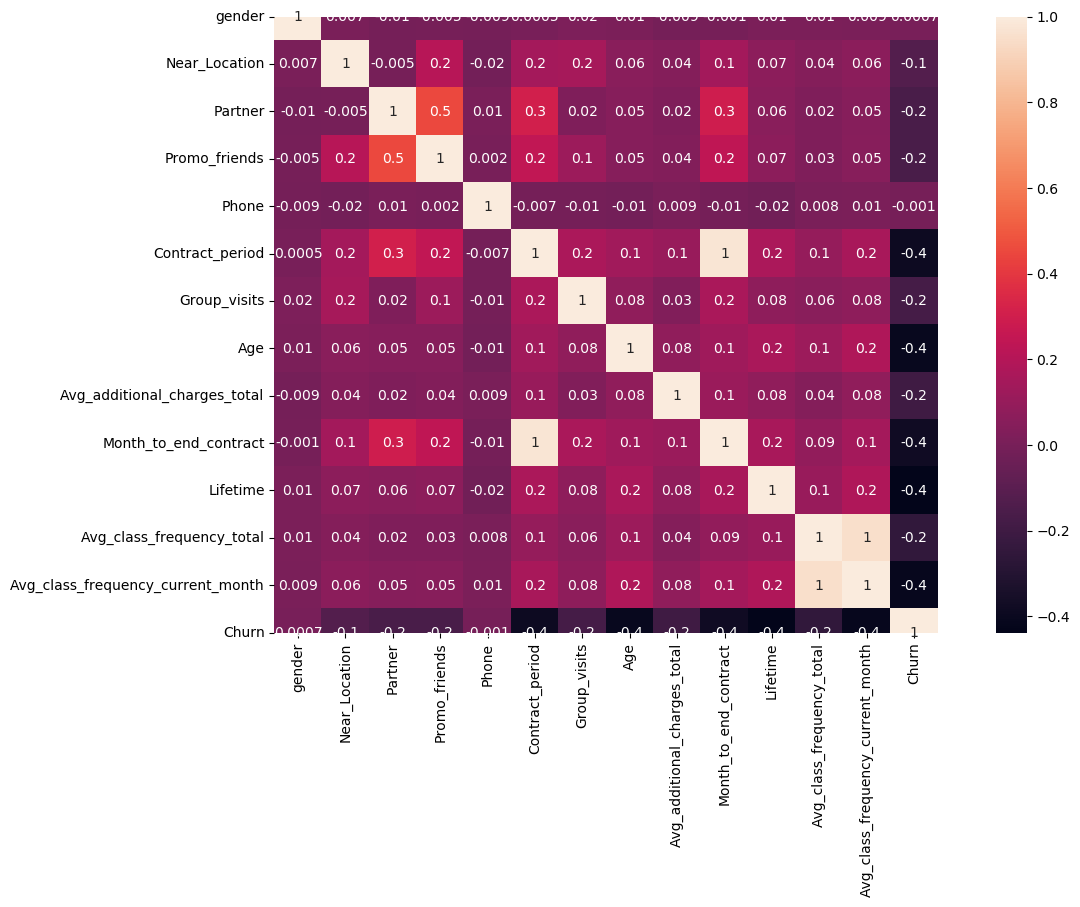

In [6]:
plt.figure(figsize = (15,8))
sns.heatmap(data.corr(), annot = True, fmt='.1g', square=True)

In [7]:
y = data['Churn'] # Вектор целевой переменной
x = StandardScaler().fit_transform(data.drop(['Churn', 'Month_to_end_contract', 'Avg_class_frequency_total', 
                                              'gender', 'Phone'], axis=1)) # Матрица объект-признак
# Разобъём набор данных на тренировочной и тестовый датасеты с помощью train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

Разработаем предсказательную модель качественного отклика методом k-ближайших соседей:

In [8]:
knn = KNeighborsClassifier(metric='euclidean') # Инициализируем модель
knn.fit(x_train, y_train)
train_predictions = knn.predict(x_test)

Количество соседей в данной метрике по стандарту выбирается равным 5. Для данного датасета оптимальное значение соседей в метрике равно 11, что вычислено далее по тексту. Была выбрана евклидова метрика из-за её простоты и популярности. Значение параметра "weights" по умолчанию устанавливается как uniforn, чтобы точки расположенные на разном расстоянии от исследуемой имели одинаковый вес.

Подсчитаем метрики "Accuracy", "Precision", "Recall", "Balanced accuracy", "F1 score":

In [11]:
acc = accuracy_score(y_test, train_predictions)
pre = precision_score(y_test, train_predictions)
rec = recall_score(y_test, train_predictions)
bal_acc = balanced_accuracy_score(y_test, train_predictions)
f1 = f1_score(y_test, train_predictions)
print(f'accuracy: {acc} \nprecision: {pre} \nrecall: {rec} \nbalanced accuracy: {bal_acc} \nf1: {f1}')

accuracy: 0.885 
precision: 0.7852760736196319 
recall: 0.7901234567901234 
balanced accuracy: 0.8551073904955183 
f1: 0.7876923076923078


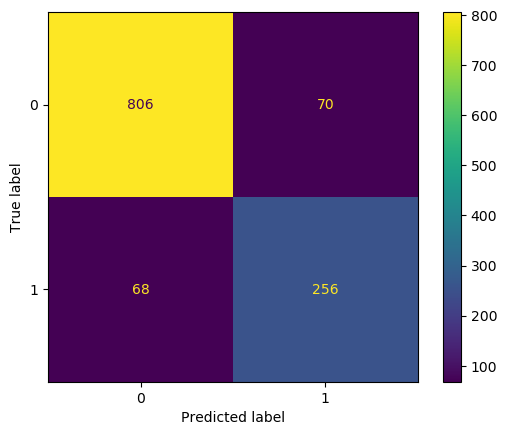

True Positive: 256 
False Positive: 70 
True Negative: 806 
False Negative: 68


In [12]:
# Высчитаем матрицу ошибок
cm = confusion_matrix(y_test,train_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()
tn, fp, fn, tp = cm.ravel() # "выпрямляем" матрицу, чтобы вытащить нужные значения
print(f'True Positive: {tp} \nFalse Positive: {fp} \nTrue Negative: {tn} \nFalse Negative: {fn}')

In [13]:
# Высчитаем ROC AUC:
knn_probs = knn.predict_proba(x_test) # получаем предказания
knn_probs = knn_probs[:, 1] # сохраняем вероятности только для положительного исхода
knn_auc = roc_auc_score(y_test, knn_probs) # рассчитываем ROC AUC
print(f'Метод k-ближайших соседей: ROC AUC={knn_auc}')
fpr_knn, tpr_knn, treshold = roc_curve(y_test, knn_probs) # рассчитываем roc-кривую
knn_roc_auc = auc(fpr_knn, tpr_knn)

Метод k-ближайших соседей: ROC AUC=0.9281561812954506


Разработаем предсказательную модель качественного отклика методом логистической регрессии

In [14]:
lr = LogisticRegression(max_iter=1000) # Инициализируем модель
lr.fit(x_train, y_train)
train_predictions = lr.predict(x_test)

Максимальное количество итераций, необходимых для сходимости, по умолчанию равное 100 было выбрано равным 1000, так как в ином случае алгоритм не получается сделать сходящимся за заданное количество итераций.

Подсчитаем метрики "Accuracy", "Precision", "Recall", "Balanced accuracy", "F1 score":

In [15]:
acc = accuracy_score(y_test, train_predictions)
pre = precision_score(y_test, train_predictions)
rec = recall_score(y_test, train_predictions)
bal_acc = balanced_accuracy_score(y_test, train_predictions)
f1 = f1_score(y_test, train_predictions)
print(f'accuracy: {acc} \nprecision: {pre} \nrecall: {rec} \nbalanced accuracy: {bal_acc} \nf1: {f1}')

accuracy: 0.9191666666666667 
precision: 0.8492307692307692 
recall: 0.8518518518518519 
balanced accuracy: 0.8979578893962455 
f1: 0.8505392912172572


Высчитаем матрицу ошибок:

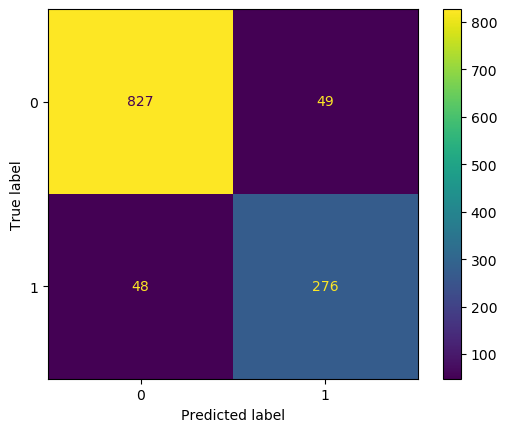

True Positive: 276 
False Positive: 49 
True Negative: 827 
False Negative: 48


In [16]:
cm = confusion_matrix(y_test, train_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot()
plt.show()
tn, fp, fn, tp = cm.ravel() # "выпрямляем" матрицу, чтобы вытащить нужные значения
print(f'True Positive: {tp} \nFalse Positive: {fp} \nTrue Negative: {tn} \nFalse Negative: {fn}')

Высчитаем ROC AUC:

In [18]:
lr_probs = lr.predict_proba(x_test)
lr_probs = lr_probs[:, 1]
lr_auc = roc_auc_score(y_test, lr_probs)
print(f'Логистическая регрессия: ROC AUC={lr_auc}')
fpr_lr, tpr_lr, treshold = roc_curve(y_test, lr_probs)
lr_roc_auc = auc(fpr_lr, tpr_lr)

Логистическая регрессия: ROC AUC=0.9686213991769548


#### Разработаем предсказательную модель качественного отклика методом случайного леса

In [19]:
rfc = RandomForestClassifier() # Инициализируем модель
rfc.fit(x_train, y_train)
train_predictions = rfc.predict(x_test)

Знеачение "max_depth" по умолчанию равно "None", что означает что узлы будут расширяться до тех пор, пока все листья не станут чистыми или пока все листья не будут содержать выборок меньше, чем "min_samples_split", которое по умолчанию равно двойке. Значение "n_estimators", отображающее количество деревьев в лесу выставлено по умолчанию равным 100.

Подсчитаем метрики "Accuracy", "Precision", "Recall", "Balanced accuracy", "F1 score":

In [20]:
acc = accuracy_score(y_test, train_predictions)
pre = precision_score(y_test, train_predictions)
rec = recall_score(y_test, train_predictions)
bal_acc = balanced_accuracy_score(y_test, train_predictions)
f1 = f1_score(y_test, train_predictions)
print(f'accuracy: {acc} \nprecision: {pre} \nrecall: {rec} \nbalanced accuracy: {bal_acc} \nf1: {f1}')

accuracy: 0.9116666666666666 
precision: 0.8516129032258064 
recall: 0.8148148148148148 
balanced accuracy: 0.8811516996448503 
f1: 0.8328075709779179


Высчитаем матрицу ошибок:

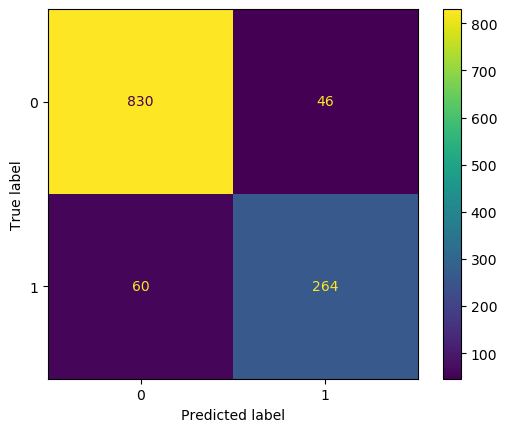

True Positive: 264 
False Positive: 46 
True Negative: 830 
False Negative: 60


In [21]:
cm = confusion_matrix(y_test, train_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
disp.plot()
plt.show()
tn, fp, fn, tp = cm.ravel() # "выпрямляем" матрицу, чтобы вытащить нужные значения
print(f'True Positive: {tp} \nFalse Positive: {fp} \nTrue Negative: {tn} \nFalse Negative: {fn}')

Высчитаем ROC AUC:

In [22]:
rfc_probs = rfc.predict_proba(x_test)
rfc_probs = rfc_probs[:, 1]
rfc_auc = roc_auc_score(y_test, rfc_probs)
print(f'Метод случайного леса: ROC AUC={rfc_auc}')
fpr_rfc, tpr_rfc, treshold = roc_curve(y_test, rfc_probs)
rfc_roc_auc = auc(fpr_rfc, tpr_rfc)

Метод случайного леса: ROC AUC=0.9554125091606066


Построим графики ROC-кривых:

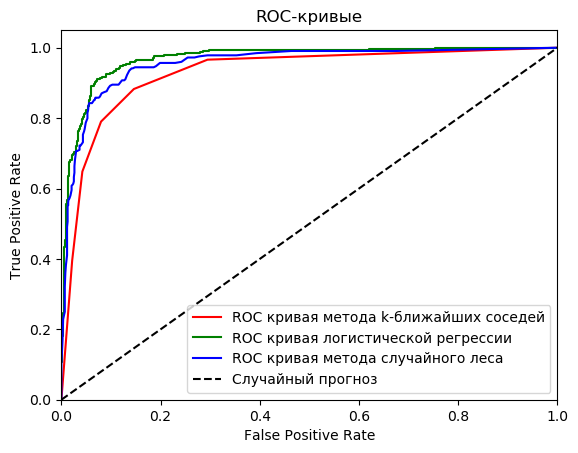

In [23]:
plt.plot(fpr_knn, tpr_knn, color='red',
         label='ROC кривая метода k-ближайших соседей' % knn_roc_auc)
plt.plot(fpr_lr, tpr_lr, color='green',
         label='ROC кривая логистической регрессии' % lr_roc_auc)
plt.plot(fpr_rfc, tpr_rfc, color='blue',
         label='ROC кривая метода случайного леса' % rfc_roc_auc)
plt.plot([0, 1], [0, 1], color='black', linestyle='--', label='Случайный прогноз')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые')
plt.legend(loc="lower right")
plt.show()

Вывод: в ходе выполнения лабораторной работы изучены алгоритмы и методы классификации данных. Были разработаны предсказательные модели, вычисляющие по набору признаков, уйдёт ли клиент из фитнес-клуба на основе методов: k- ближайших соседей, логистической регрессии, случайного леса. выли высчитаны метрики, позволяющие оценить качество работы классификаторов. Лучше всего высчитывает предсказания классификатор, основанный на методе логистической регрессии, а хуже всех себя показал метод k-ближайших соседей. Тем не менее, все три метода классификации данных показали неплохие результаты. Для каждого метода были, также, были построены матрицы неточностей и график ROC-кривых, который подтвердил полученные оценки качества работы методов классификации.